## Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\rohit\Downloads\Assignments\data science assignment\11-Random Forest\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [3]:
df.rename(columns={'Marital.Status' : 'Marital_Status', 'Taxable.Income' : 'Income',
                   'City.Population' : 'Population','Work.Experience' : 'Experience'}, inplace=True)
df

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.describe()

,Income,Population,Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    object
 1   Marital_Status  600 non-null    object
 2   Income          600 non-null    int64 
 3   Population      600 non-null    int64 
 4   Experience      600 non-null    int64 
 5   Urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')

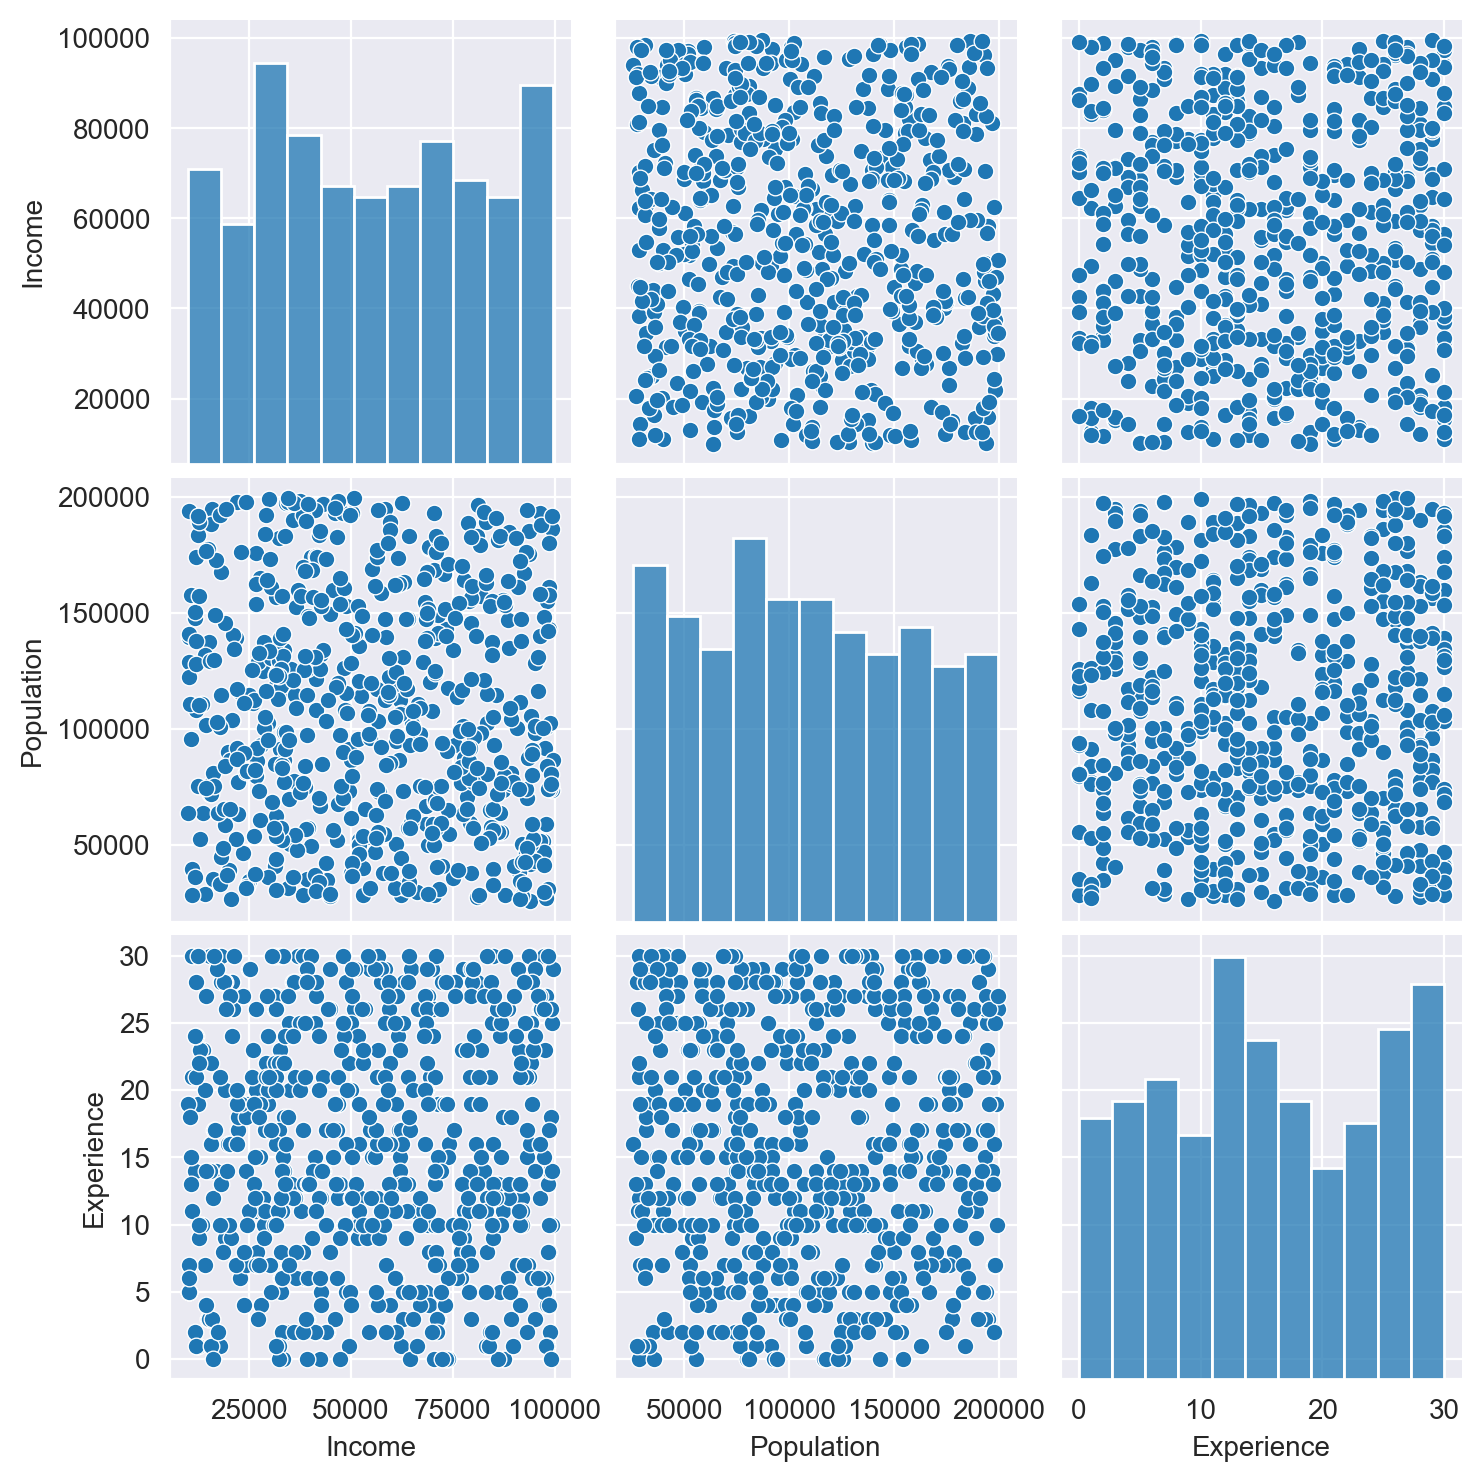

In [7]:
sns.pairplot(df)

In [8]:
df['Status'] = np.where((df['Income'] <= 30000), 'Risky', 'Good')
df

,Undergrad,Marital_Status,Income,Population,Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
df1 = df.drop(columns='Income')
df1

,Undergrad,Marital_Status,Population,Experience,Urban,Status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [10]:
oe = OrdinalEncoder()

df1.iloc[:,[0,1,4]] = oe.fit_transform(df1.iloc[:,[0,1,4]])
df1

,Undergrad,Marital_Status,Population,Experience,Urban,Status
0,0.0,2.0,50047,10,1.0,Good
1,1.0,0.0,134075,18,1.0,Good
2,0.0,1.0,160205,30,1.0,Good
3,1.0,2.0,193264,15,1.0,Good
4,0.0,1.0,27533,28,0.0,Good
...,...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0,Good
596,1.0,0.0,55369,2,1.0,Good
597,0.0,0.0,154058,0,1.0,Good
598,1.0,1.0,180083,17,0.0,Good


## Splitting the data

In [11]:
x = df1.iloc[:,:4]
y = df1['Status']

In [12]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Status, Length: 600, dtype: object

In [13]:
y.value_counts()

Good     476
Risky    124
Name: Status, dtype: int64

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

## Model building

In [15]:
num_trees = 100
kfold = KFold(n_splits=5)
model = RandomForestClassifier(n_estimators=num_trees)

In [16]:
c = cross_val_score(model, x, y, cv=kfold)

In [17]:
c.mean()*100

74.0

In [18]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [19]:
ypred = rf.predict(xtest)
ypred

array(['Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good'

In [20]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

        Good       0.79      0.92      0.85        97
       Risky       0.00      0.00      0.00        23

    accuracy                           0.74       120
   macro avg       0.40      0.46      0.43       120
weighted avg       0.64      0.74      0.69       120



In [21]:
accuracy_score(ytest, ypred)

0.7416666666666667